In [1]:
import plot_utils

# Accuracy per Round

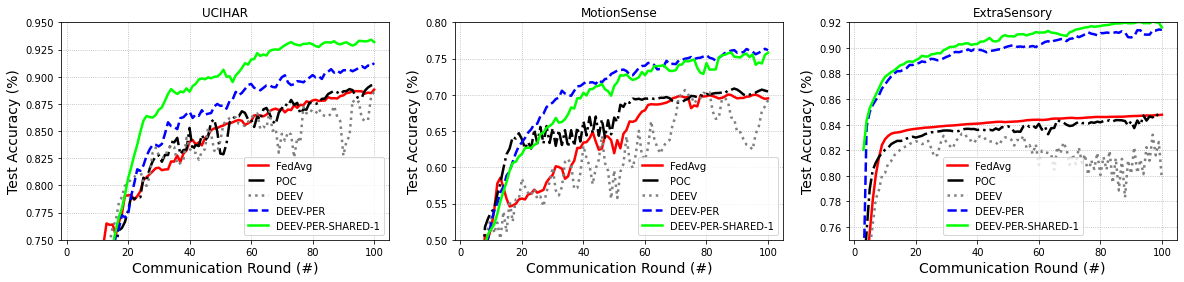

In [819]:
plot_utils.plot_acc()

# Communication Cost Reduction

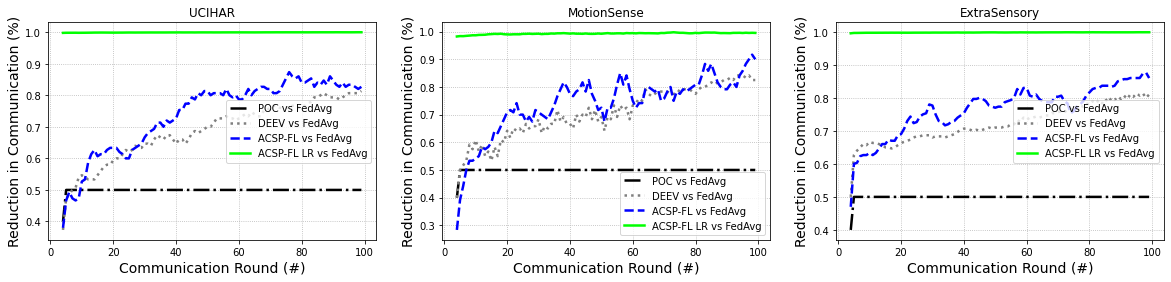

In [2]:
plot_utils.plot_net()

# Latency Reduction

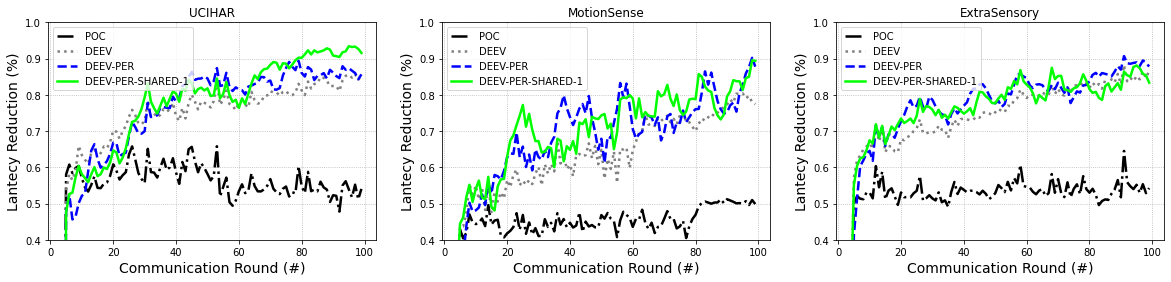

In [787]:
plot_time()

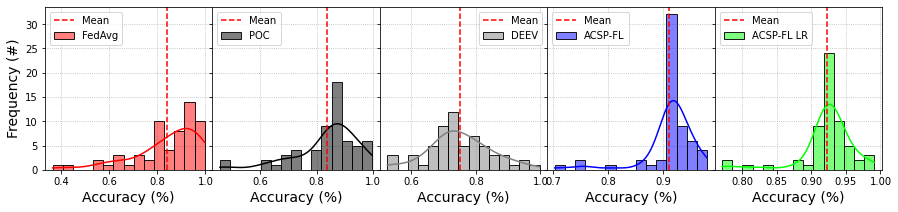

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_acc():
    fig, ax  = plt.subplots(nrows=1, ncols=5, figsize=(15, 3), sharey=True, sharex=False)
    DATASET = ['ExtraSensory',]
    
    for idx, ds in enumerate(DATASET):
        for idx_sol, sol in enumerate(plot_utils.SOLUTIONS):

            df = pd.read_csv(f'../logs/{ds}/{sol}/DNN/evaluate_client.csv',
                             names=['round', 'cid', 'param', 'loss', 'acc'])
                                        
            df_filtered = df[df['round']== 100]
            sns.histplot(df_filtered['acc'].values, label=plot_utils.NAMES[sol], ax=ax[idx_sol],
                         color=plot_utils.COLORS[sol],  kde=True, bins=15)
            
            ax[idx_sol].axvline(df_filtered['acc'].mean(), color='r', label='Mean', linestyle='--')
            ax[idx_sol].set_ylabel('Frequency (#)', size=14)
            # ax[idx_sol].set_xticks([],size=14)}
            ax[idx_sol].set_xlabel('Accuracy (%)', size=14)    
            ax[idx_sol].legend()
            ax[idx_sol].set_axisbelow(True)
            ax[idx_sol].grid(True, linestyle=':')

        plt.subplots_adjust(wspace=0, hspace=0)
        fig.savefig(f'plots/hist_acc_{ds}.pdf', dpi=200, format="pdf", bbox_inches="tight")
plot_hist_acc()

# Final Accuracy per Client

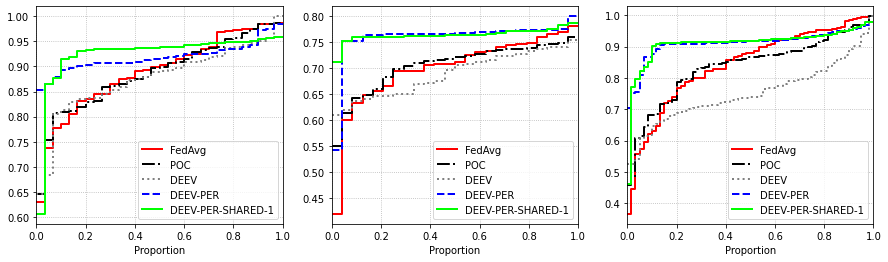

In [822]:
plot_utils.plot_cdf_acc()

# Selected Clients

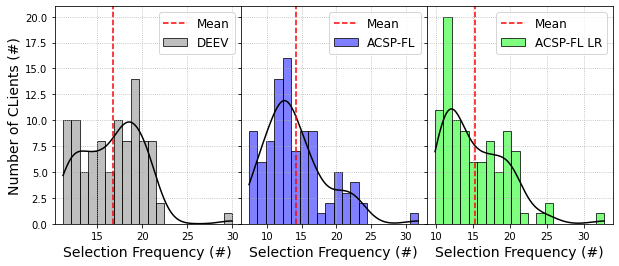

In [55]:
import plot_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def client_selected():
    DATASET = ['ExtraSensory',]
    fig, ax  = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharey=True, sharex=False)
    SOLS = ['DEEV-DEEV-0.01', 'DEEV-PER-DEEV-0.01', 'DEEV-PER-SHARED-3-DEEV-0.01']
    for ds in DATASET:
        for idx, sol in enumerate(SOLS):
            # if 'FedAvg' in sol or 'POC' in sol: continue
    
            df = pd.read_csv(f'../logs/{ds}/{sol}/DNN/train_client.csv',
                             names=['round', 'cid', 'selected', 'time', 'param', 'loss', 'acc'])
            
            
            df_grouped = df.groupby('round').sum()
            selected   = df_grouped['selected'].rolling(5).mean()
            sns.histplot(selected, label=plot_utils.NAMES[sol], ax=ax[idx],
                         color=plot_utils.COLORS[sol],  bins=20, kde=True)
                         
            
            ax[idx].lines[0].set_color('k')
            ax[idx].axvline(selected.mean(), label='Mean', color='r', linestyle='--')
            ax[idx].legend(fontsize=12)
            ax[idx].grid(True, linestyle=':')
            # ax[idx].set_title(f'{ds}')
            ax[idx].set_xlabel(f'Selection Frequency (#)', size=14)
            ax[idx].set_ylabel(f'Number of CLients (#)', size=14)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.savefig(f'plots/selected_clients_hist_{ds}.pdf', dpi=200, format="pdf", bbox_inches="tight")
client_selected()

# Personalization Analysis - Accuracy

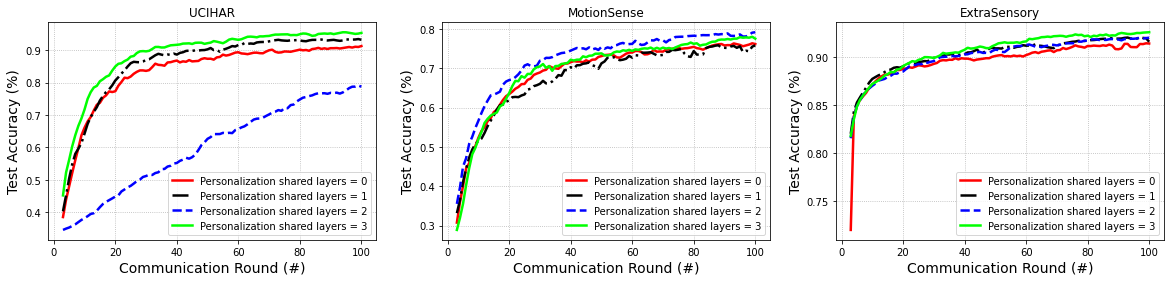

In [824]:
plot_utils.plot_acc_devper()

# Personalization Analysis - Communication Cost

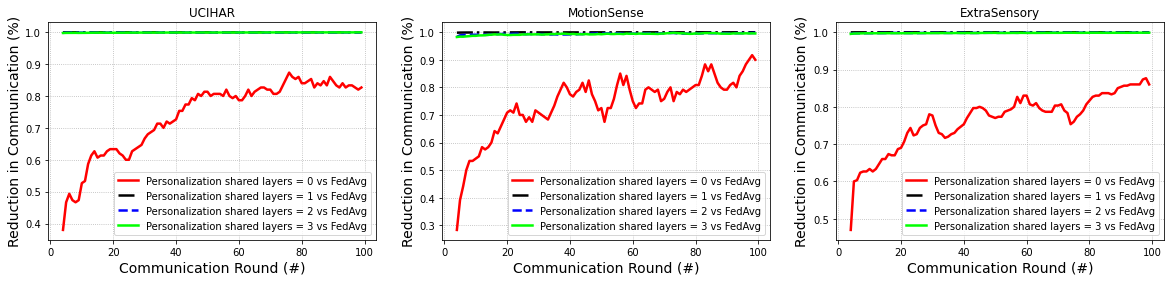

In [2]:
plot_utils.plot_net_devper()

# Personalization Analysis - Latency

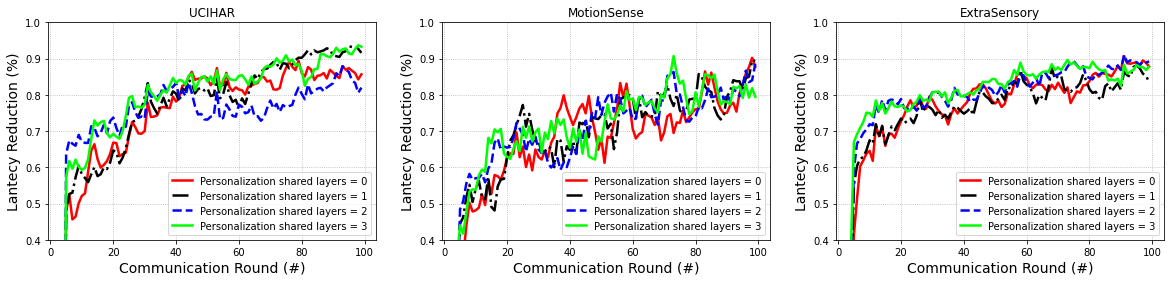

In [826]:
plot_utils.plot_time_devper()

# Save figures

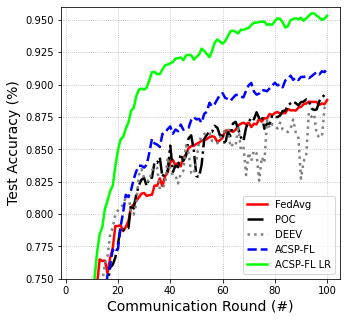

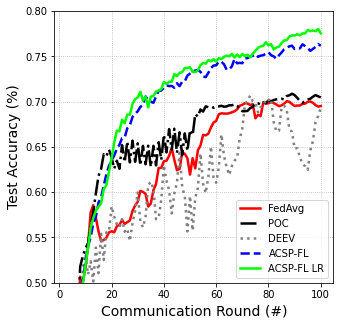

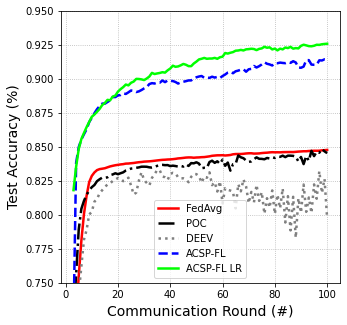

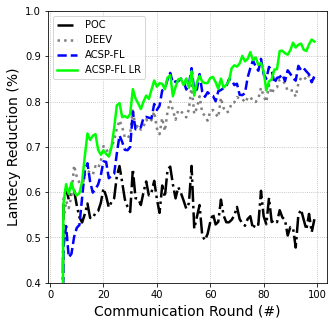

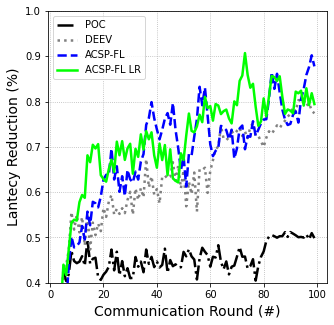

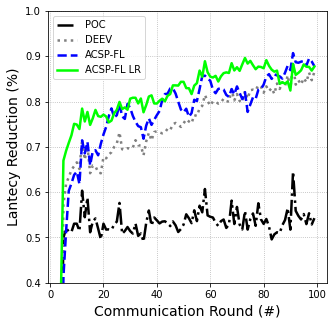

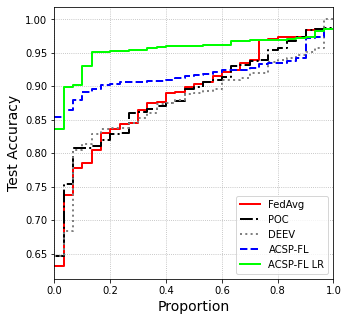

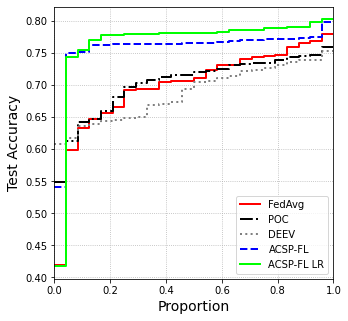

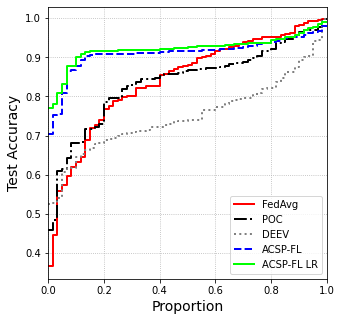

In [1]:
import plot_utils
plot_utils.plot_acc_savefig() 
plot_utils.plot_time_savefig()
plot_utils.plot_cdf_acc_savefig()